## Instalación

Scikit-learn requiere:

    Python (>= 2.6 or >= 3.3),
    NumPy (>= 1.6.1),
    SciPy (>= 0.9).

Una vez instalados los paquetes se puede instalar con

pip install -U scikit-learn

o conda:

conda install scikit-learn 
Aunque es uno de los paquetes por defecto de Anaconda.



http://scikit-learn.org/stable/install.html

## Cheat Sheet

In [1]:
from IPython.display import IFrame
IFrame("./Scikit_Learn_Cheat_Sheet_Python.pdf", width=800, height=600)

## Cargar datos

A parte de los propios datos que incluye de ejemplo permite cargar cualquier tipo de array de numpy, matrices de scipy o dataframes de Pandas.

Un dataset en sklearn es lo siguiente:
- data
- target
- feature_names
- target_names

In [2]:
from sklearn import datasets

# The digits dataset
iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.feature_names)
print(iris.target_names)


[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
[0 0 0 0 0 0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Como es más fácil trabajar con atributos (quitarlos, ponerlos etc) vamos a usar pandas.

In [3]:
import pandas as pd
df=pd.read_csv('iris.csv', sep=',',header=None)
df.values[:10]


array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa']], dtype=object)

In [4]:
# lo más fácil es generar csv sin cabecera y luego añadirsela, así les podemos concatenar etc más fácilmente


df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)',"Class"]

In [5]:
train_data = df.drop(["Class"], axis=1)
train_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# solo queremos los datos
train_data = train_data.values

In [7]:
target_data = df["Class"].values


In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)

In [9]:
# entrena

forest = forest.fit(train_data, target_data)

In [10]:
# hace la predicción

prediccion = forest.predict([[4.4, 2.9, 1.4, 0.2]])
prediccion

array(['Iris-setosa'], dtype=object)

## Más cosas importantes

- Evaluar el clasificador: Para saber que hemos elegido el mejor clasificador o los mejores parámetros de este
- Serializar y deserializar: Para entrenar el clasificador una vez y usarlo siempre
- Conectar las aplicaciones: Se cargaría el clasificador y se esperarian ejemplos (sockets o alternativas)

### Evaluar

In [11]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(forest, train_data, target_data, cv=5))


C:\Users\Pablo Alejos\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 0.96666667  0.96666667  0.93333333  0.96666667  1.        ]


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 100)

accuracyForest = cross_val_score(forest, train_data, target_data, cv=5)
accuracyGBC = cross_val_score(gbc, train_data, target_data, cv=5)

In [13]:
%matplotlib inline

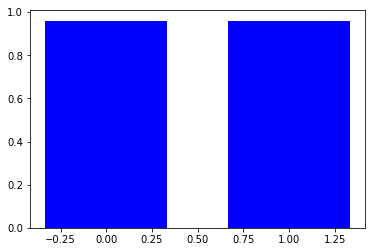

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y = [accuracyForest.mean(), accuracyGBC.mean()]

N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")

plt.show()

### Serializar

In [15]:
import pickle # serializar y deserializar

forestDefinitivo = forest.fit(train_data, target_data)

filename = 'randomForest.sav'
pickle.dump(forestDefinitivo, open(filename, 'wb'))

# el resto de veces 



In [16]:
%%time
# cuando arranca la aplicación se carga
loaded_model = pickle.load(open(filename, 'rb'))

Wall time: 13 ms


In [17]:
%%time

# espera a que lleguen ejemplos
result = loaded_model.predict([[4.4, 2.9, 1.4, 0.2]])
print(result)

['Iris-setosa']
Wall time: 45 ms
